قسمت الف

Text(0, 0.5, 'Price')

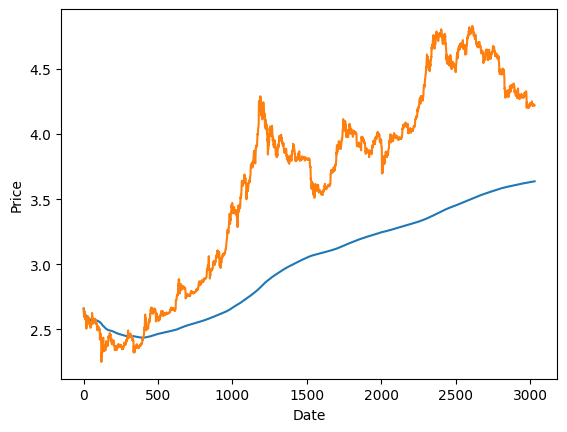

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bitcoin_price=[] # List to store bitcoin price
simple_averages = []  # List to store simple average values
simple_average =0

counters =[] # use this for counting the days 
counter = 0

# Process the data as a data stream
with open('Bitcoin.csv', 'r') as file:
    header = file.readline().strip().split(',')
    
    close_index = header.index('Close')

    for line in file:
        # Read and process each line in the data stream
        data = line.strip().split(',')
        
        price = float(data[close_index])

        # Take the logarithm of the price
        log_price = np.log10(price)
        bitcoin_price.append(float(log_price))
        # Calculate simple average
        simple_average = (simple_average * counter + log_price) / (counter + 1)
        
        simple_averages.append(float(simple_average))
        
        counter += 1 
        counters.append(counter)

# Plot the simple average
plt.plot(counters, [x for x in simple_averages], label='Simple Average')

plt.plot(counters, [x for x in bitcoin_price], label='Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price')

قسمت ب

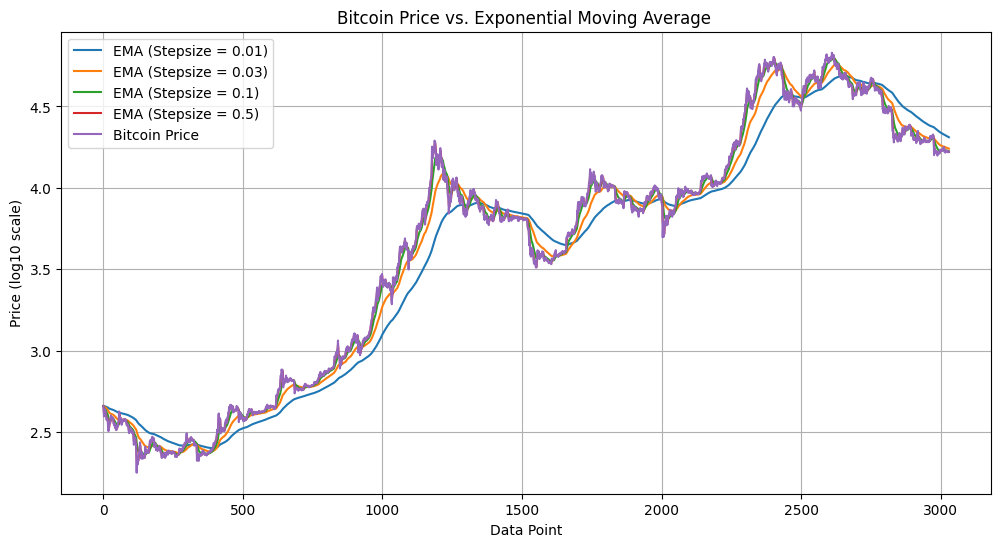

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
stepsizes = [0.01, 0.03, 0.1, 0.5]  # Example stepsize values
ema_values = [[] for _ in range(len(stepsizes))]  # List to store EMA values for each stepsize
bitcoin_price = []
counter = 0  # Counter to keep track of the number of data points


# Process the data as a data stream
with open('Bitcoin.csv', 'r') as file:
    header = file.readline().strip().split(',')
    close_index = header.index('Close')

    for line in file:
        # Read and process each line in the data stream
        data = line.strip().split(',')
        price = float(data[close_index])

        # Take the logarithm of the price
        log_price = np.log10(price)

        bitcoin_price.append(float(log_price))


        # Calculate the exponential moving average for each stepsize
        for i, stepsize in enumerate(stepsizes):
            if len(ema_values[i]) == 0:
                ema = log_price  # Start with the first value as the initial EMA
            else:
                ema = (1 - stepsize) * ema_values[i][-1] + stepsize * log_price
            ema_values[i].append(ema)

        counter += 1


# Plot the data
plt.figure(figsize=(12, 6))
for i, stepsize in enumerate(stepsizes):
    plt.plot(range(1, counter + 1), ema_values[i], label=f'EMA (Stepsize = {stepsize})')

plt.plot(range(1, counter + 1), [x for x in bitcoin_price], label='Bitcoin Price')

plt.xlabel('Data Point')
plt.ylabel('Price (log10 scale)')
plt.title('Bitcoin Price vs. Exponential Moving Average ')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



قسمت ج

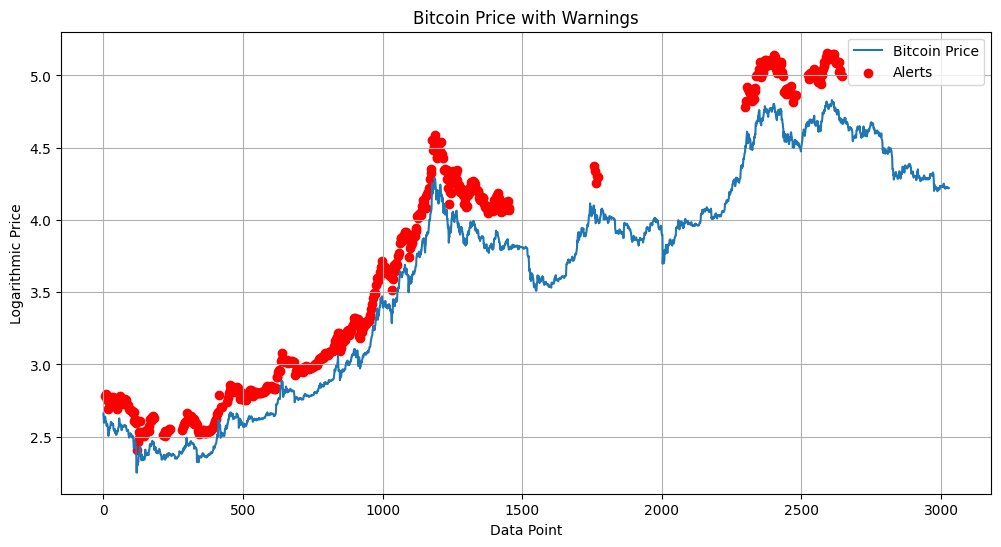

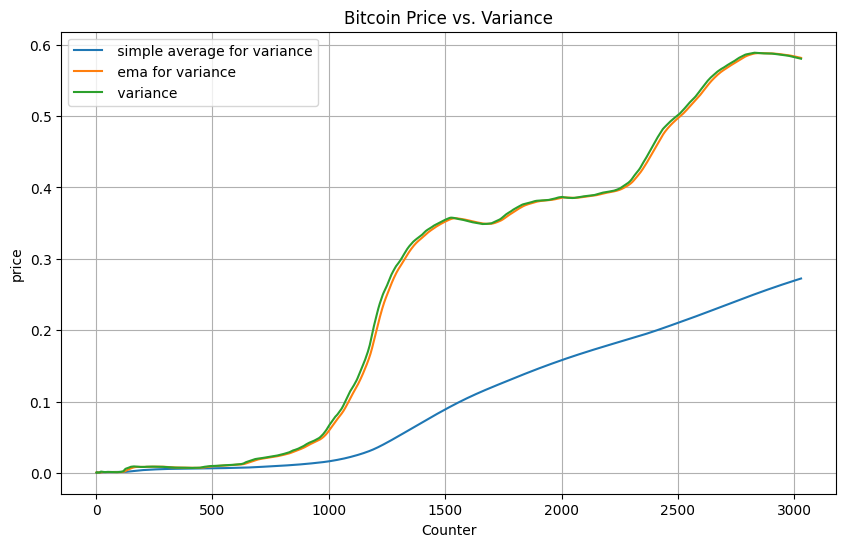

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
n = 0  # Number of data points
mean = 0  # Mean of the data stream
M2 = 0  # Sum of squared differences from the mean
variances = []  # List to store variance values
mean_variances = []  # List to store mean variance values
mean_variance = 0
ema_values = []  # List to store EMA values for variance
bitcoin_price = []

step_size = 0.06  # Example step size
alerts = []  # List to store alert indicators
alert_dates = []  # List to store corresponding dates for alerts
consecutive_alerts = 0  # Counter for consecutive alerts
k =0.01
# Process the data as a data stream
with open('Bitcoin.csv', 'r') as file:
    header = file.readline().strip().split(',')
    close_index = header.index('Close')

    for line in file:
        # Read and process each line in the data stream
        data = line.strip().split(',')
        price = float(data[close_index])
        # Take the logarithm of the price
        log_price = np.log10(price)
        bitcoin_price.append(float(log_price))
        # Update the variance calculation
        n += 1
        delta = log_price - mean
        mean += delta / n
        delta2 = log_price - mean
        M2 += delta * delta2

        # Calculate the variance if there are at least two data points
        if n > 1:
            variance = M2 / (n - 1)
            variances.append(variance)

            # Calculate the simple average for variance
            mean_variance = (mean_variance * n + variance) / (n + 1)
            mean_variances.append(mean_variance)

            # Calculate the exponential moving average for variance
            if len(ema_values) == 0:
                ema = variance  # Start with the first value as the initial EMA
            else:
                ema = (1 - step_size) * ema_values[-1] + step_size * variance
            ema_values.append(ema)

        # Check if the current point exceeds the threshold
        if abs(variance - ema) > k * ema:
            
            consecutive_alerts += 1
        else:
            consecutive_alerts = 0

        # Check if consecutive alerts have occurred
        if consecutive_alerts >= 3:
            alerts.append(log_price + 0.07*log_price)  # Trigger alert
            alert_dates.append(n)  # Store corresponding date for the alert
            consecutive_alerts = 0  # Reset consecutive alerts counter

# Generate counters
counters = range(2, n + 1)  # Start from 2 to exclude the initial variance

# Plot the data

plt.figure(figsize=(12, 6))
plt.plot(bitcoin_price, label='Bitcoin Price')
plt.scatter(alert_dates, alerts, color='red', marker='o', label='Alerts')
plt.xlabel('Data Point')
plt.ylabel('Logarithmic Price')
plt.title('Bitcoin Price with Warnings')
plt.legend()
plt.grid(True)
plt.show()

# Plot the variance

plt.figure(figsize=(10, 6))

plt.plot(counters , mean_variances , label =" simple average for variance")
plt.plot(counters , ema_values , label =" ema for variance")
plt.plot(counters , variances , label =" variance ")

plt.xlabel('Counter')
plt.ylabel('price')
plt.title('Bitcoin Price vs. Variance')
plt.legend()
plt.grid(True)
plt.show()